In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# https://www.youtube.com/watch?v=NKMHhm2Zbkw

S0 = 1
I0 = 0
a = 0.01
r = 0.001
q = r/a
R0 = q*S0
q, R0, S0>1/q

(0.1, 0.1, False)

In [36]:
def f(q):
    return 1/q *(1 + np.log(q*S0))

def imax(q):
    return I0 + S0 - f(q)

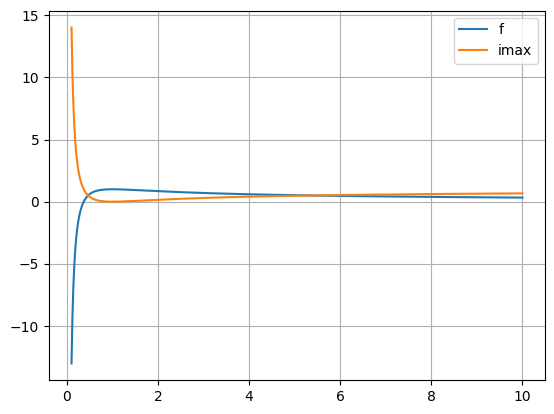

In [37]:
x = np.linspace(0.1,10,1000)
y1 = f(x)
y2 = imax(x)
plt.plot(x,y1,label="f")
plt.plot(x,y2, label="imax")
plt.legend()
plt.grid()

# Etude 1

In [38]:
S0 = 0.9
I0 = 0.1

a = 0.3   # infection rate
b = 0.2  # immunized rate
r = 0.3  # recovered rate
q = a/b
R0 = q*S0
q, R0, S0>1/q

(1.4999999999999998, 1.3499999999999999, True)

In [39]:
def S(t):
    return np.exp(-a*I0*S0*t)

def I(t):
    return np.exp((a*S0*I0 - b*I0)*t) - 1

def R(t):
    return np.exp(b*I0*t) -1

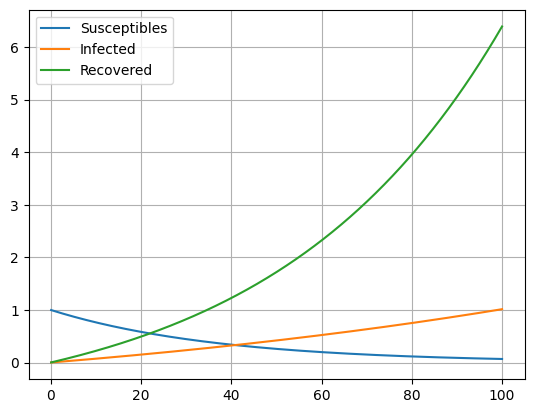

In [40]:
x = np.linspace(0.1,100,1000)
y1 = S(x)
y2 = I(x)
y3 = R(x)

plt.plot(x,y1,label="Susceptibles")
plt.plot(x,y2, label="Infected")
plt.plot(x,y3, label="Recovered")
plt.legend()
plt.grid()

# Etude 2

In [41]:
ndays = 100
dt = 0.001  # time step in days
npts = int(ndays/dt)

beta = (1.0/3.0)    # infection rate one infection among n persons 1/n
gamma = (1.0/10.0)  # recovery rate 1 recovery every d days 1/d
R0 = beta / gamma   # number of infections every d days with n contacts, the lower the best
print(R0)



3.333333333333333


In [42]:
S = np.zeros(npts)
I = np.zeros(npts)
R = np.zeros(npts)
t = np.arange(npts)*dt


# Total population, N.
N = 1
I[0] = 0.001
S[0] = N - I[0]
R[0] = 0
# computing with series  see ode_SIR.py
for i in range(npts-1):
    S[i+1] = S[i] - beta*S[i]*I[i]/N*dt
    I[i+1] = I[i] + (beta*S[i]*I[i]/N - gamma*I[i])*dt
    R[i+1] = R[i] + gamma*I[i]*dt

print(I.max())  # I.max is when the infective and recovered curves have the same variation in absolute value

S+I+R

0.3391226543962971


array([1., 1., 1., ..., 1., 1., 1.])

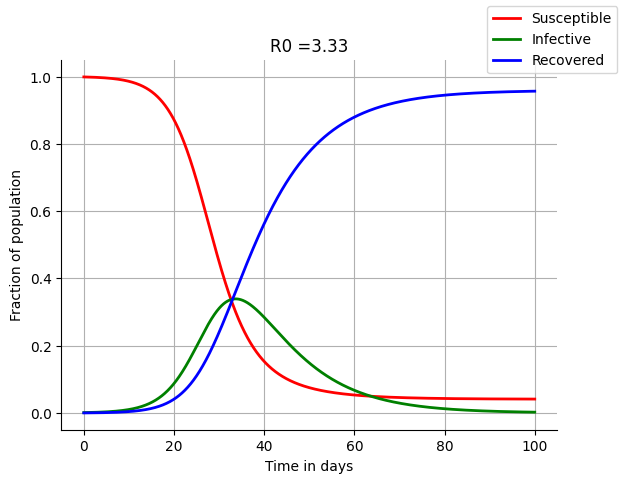

In [43]:

fig = plt.figure(1); fig.clf()
ax = fig.add_subplot(111, axisbelow=True)
plt.plot(t,S/N,'r',lw=2, label='Susceptible')
plt.plot(t,I/N,'g',lw=2, label='Infective')
plt.plot(t,R/N,'b',lw=2, label='Recovered')
#plt.plot(t,T/N,'b',lw=2, label='Recovered')
fig.legend(); plt.xlabel('Time in days');plt.ylabel('Fraction of population')
for spine in ('top', 'right'): #, 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('R0 ='+str(round(R0,2)))
plt.grid()


# Etude 3

In [44]:
saturation = False
confinement = False

P = 60000000       # population
t = 100000         # taille de confinement
if confinement: P = t
N0 = 9043          # malades au début du confinement
E = 1              # personnes en contact par malade

#statistiques bing 
data1 = [9043,10995,12612,14459,16018,19856,22304,25233,29155,37575,40174]  # confirmés
data2 = [148, 372, 450, 562, 674, 860,1100,1331,1696,2314,2606]             # morts
data3 = [12,12,1300,1587, 2200, 2200, 3281,3900,4948,5700,7202]             # guéris
data4 = [a-(b+c) for a,b,c in zip(data1,data2,data3)]                       # actifs
print('Statistiques :')
print('- malades',data1)
print('- morts',data2)
print('- guéris',data3)
print('- actifs',data4)


Statistiques :
- malades [9043, 10995, 12612, 14459, 16018, 19856, 22304, 25233, 29155, 37575, 40174]
- morts [148, 372, 450, 562, 674, 860, 1100, 1331, 1696, 2314, 2606]
- guéris [12, 12, 1300, 1587, 2200, 2200, 3281, 3900, 4948, 5700, 7202]
- actifs [8883, 10611, 10862, 12310, 13144, 16796, 17923, 20002, 22511, 29561, 30366]


In [45]:

#pour calculer le pic de contamination et le jour (quand data1 devient inférieur à mad_max)
mad_max = max(data1)               #max cas confirmés
index_max = data1.index(mad_max)   # index max dans data1

delta = [0]
[delta.append(a-b) for a,b in zip(data1[1:],data1[:-1])]
print('delta confimés', delta)


delta confimés [0, 1952, 1617, 1847, 1559, 3838, 2448, 2929, 3922, 8420, 2599]


In [46]:

print(data1[1:])
print(data4[:-1])
taux_infection = [a/b for a,b in zip(delta[1:],data4[:-1])]      # delta confirmés(auj,hier) par rapport aux actifs d'hier
taux_décès = [a/b for a,b in zip(data2[1:],data1[:-1])]                   # par rapport aux malades confirmés d'hier
taux_guérison = [a/b for a,b in zip(data3[1:],data1[:-1])]                # par rapport aux malades confirmés d'hier
print(data4[-2],(40174-37575)/data4[-2])


[10995, 12612, 14459, 16018, 19856, 22304, 25233, 29155, 37575, 40174]
[8883, 10611, 10862, 12310, 13144, 16796, 17923, 20002, 22511, 29561]
29561 0.08791989445553262


In [47]:

# taux infection = delta(auj,hier)/actifs_hier      (40174-37575)/data4[-2]
# infection = confimés_hier*



print('\nEvolution taux infection:\n',taux_infection)
print('\nEvolution taux décès:\n',taux_décès)
print('\nEvolution taux guérison:\n',taux_guérison)




Evolution taux infection:
 [0.21974558144770912, 0.15238903025162567, 0.17004234947523475, 0.12664500406173843, 0.2919963481436397, 0.145748987854251, 0.16342130223734866, 0.19608039196080393, 0.3740393585358269, 0.08791989445553262]

Evolution taux décès:
 [0.041136790887979655, 0.040927694406548434, 0.044560735807167774, 0.04661456532263642, 0.05368959920089899, 0.05539887187751813, 0.05967539454806313, 0.06721356953196211, 0.07936889041330818, 0.069354624085163]

Evolution taux guérison:
 [0.0013269932544509565, 0.11823556161891768, 0.12583254043767841, 0.15215436752195866, 0.13734548632788113, 0.16523972602739725, 0.17485652797704448, 0.19609241865810645, 0.19550677413822673, 0.19166999334664006]


In [48]:

# taux de contamination pour évaluation de l'évolution
offset = -1
N = data4[offset]      # malades actifs aujourd'hui
print('\nEstimation à partir des chiffres du jour',offset)  # -1 : aujourd'hui
print('Nombre de malades hier :',N)



Estimation à partir des chiffres du jour -1
Nombre de malades hier : 30366


In [49]:

p = taux_infection[offset]    # taux d'infection
d = taux_décès[offset]        # taux de décès
g = taux_guérison[offset]     # taux de guérison
print('Taux :')
print('- infection :', '{:1.2f}%'.format(p*100))
print('- décès :', '{:1.2f}%'.format(d*100))
print('- guérison :', '{:1.2f}%'.format(g*100))


Taux :
- infection : 8.79%
- décès : 6.94%
- guérison : 19.17%


In [50]:

def nextday(N):    #delta confirmés du jour suivant
    global P, p, saturation
    if saturation : p = 0; return N
    return (N*E*p)

print('Nombres d\'actifs aujourd\'hui :',N)
nxtd = nextday(N)    # aujourd'hui
print('Delta contaminés demain :',nxtd)
print('Confirmés demain :', data1[-1]+nxtd)


Nombres d'actifs aujourd'hui : 30366
Delta contaminés demain : 2669.775515036704
Confirmés demain : 42843.7755150367


In [51]:

p = 0
d = 0
g = 0.8


In [52]:
def evolution(ndays):
    global P,saturation, mad_max, index_max  
    n = data1            # cumul du nombre de malades
    m = data2            # morts par jour
    s = data3            # guérisons par jour
    a = data4            # actifs par jour
    #t = taux_infection
    c = delta            # évolution confirmés
    ppl = [P,]           # évolution population (décompte des morts)
    N = data1[-1]        # confirmés aujourd'hui
    pic = False
    lastN = data1[-1]    # repère confirmés hier pur calculer le pic
    decompte = data2[-1] + data3[-1]  # morts + guéris du jour
    for i in range(ndays):
        if N < 1 : break         # si plus de malades, fin de l'épidémie
        N = N - decompte              # actifs du jour
        N = nextday(N) + n[-1]        # cas confirmés le jour suivant
        if N > mad_max : mad_max = int(N)
        if N > P : N = P; mad_max = N; saturation = True   # quand toute la population est malade 
        m.append(int(N*d))            # évolution du nombre des morts, d:taux de décès parmi les malades
        P = P-N*d                     # décompte des morts de la population
        ppl.append(int(P))            # évolution de la population
        s.append(int(N*g))            # évolution du nombre des guéris, g:taux de guérison parmi les malades            
        n.append(int(N))              # évolution du nombre des malades        
        if N < lastN and not pic:
            print('Pic atteint le jour', index_max+i, 'avec',mad_max,'infectés'); pic = True
        c.append(int(N-lastN))        # évolution du nombre des cas confirmés par jour
        decompte = int(N*(d+g))       # decompte des morts et des guéris du nombre des malades
        a.append(int(N-decompte))     # évolution des actifs
        lastN = N                     # malades du jour pour calcul évolution du demain
        
    print('Dernier jour épidémie dans',i,'jours')
    #print(n,max(n)/P)
    #print(m,max(m)/P)
    print('Total de morts :',max(np.cumsum(m)))
    return i,ppl,n,m,s,c

# projection de la contamination à partir des taux du jour
i,p,n,m,s,c = evolution(100)


Dernier jour épidémie dans 99 jours
Total de morts : 12113


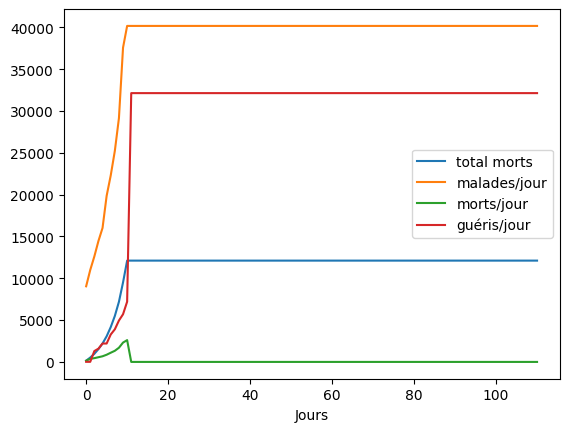

In [53]:

def draw(n,m,s,p):
    fig, ax = plt.subplots() 
    x = np.arange(len(n))
    y = n                    # évolutrion du nombre des malades
    z = np.cumsum(m)         # évolution du nombre des morts
    w = np.cumsum(s)         # évolution du nombre des guéris
    v = p                    # évolution de la population
    if max(n)>1e7 :
        #plt.plot(x,v, label='total population')
        ax.set_ylabel('dizaines de millions')    
    plt.plot(x,z, label='total morts')
    #plt.plot(x,w, label='total guéris')
    plt.plot(x,y, label='malades/jour')
    plt.plot(x,m, label='morts/jour')
    plt.plot(x,s, label='guéris/jour')
    ax.set_xlabel('Jours')                   
    
    plt.legend()
    plt.show()
    
draw(n,m,s,p)


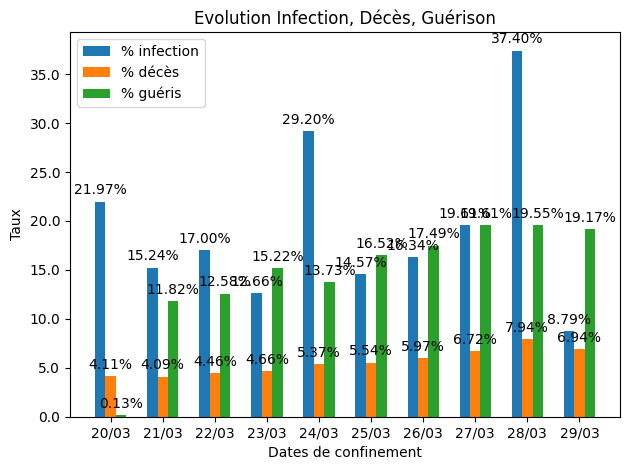

In [54]:

def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:1.2f}%'.format(height*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

def percent(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 100)

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(percent)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
x = np.arange(len(taux_infection))  
width = 0.2  # the width of the bars 
cols = ['% infection', '% décès','% guéris']
rects1 = ax.bar(x - width, taux_infection, width, label=cols[0])
rects2 = ax.bar(x , taux_décès, width, label=cols[1])
rects3 = ax.bar(x + width, taux_guérison, width, label=cols[2])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Taux')
ax.set_xlabel('Dates de confinement')
ax.set_title('Evolution Infection, Décès, Guérison')
ax.set_xticks(x)
labels = ('20/03','21/03','22/03','23/03','24/03','25/03','26/03','27/03','28/03','29/03')
ax.set_xticklabels(labels)
autolabel(ax, rects1)
autolabel(ax, rects2)
autolabel(ax, rects3)
fig.tight_layout()
ax.legend()
fig.tight_layout()
plt.show()


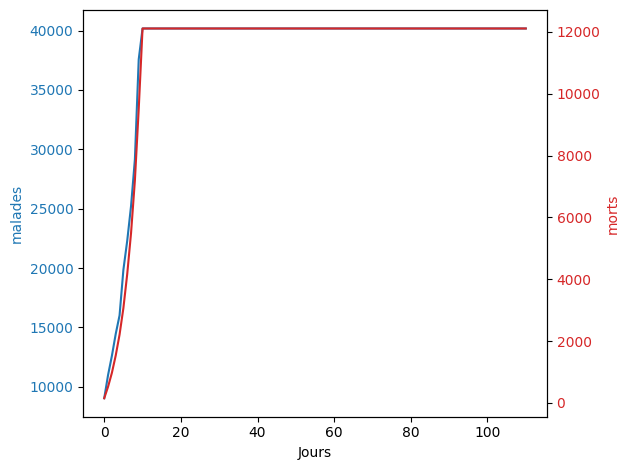

In [55]:

# evolution malades et morts
fig, ax1 = plt.subplots()
color = 'tab:blue'
x = np.arange(len(c))
y = n                  #[k*(k>=0) for k in np.cumsum(c)]
z = np.cumsum(m)
ax1.plot(x,y, label='progression malades', color=color)
ax1.set_ylabel('malades', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Jours')
#ax1.legend()
color = 'tab:red'
ax2 = ax1.twinx()
ax2.plot(x,z, label='total morts', color=color)
ax2.set_ylabel('morts', color=color)
ax2.tick_params(axis='y', labelcolor=color)
if max(z)>1e7 : ax2.set_ylabel('dizaines de millions')
fig.tight_layout()
#ax2.legend()
plt.show()


# Etude 4

In [56]:
ndays = 100
dt = 0.001  # time step in days
npts = int(ndays/dt)
S = np.zeros(npts)
I = np.zeros(npts)
R = np.zeros(npts)
D = np.zeros(npts)
t = np.arange(npts)*dt

n = 5.0
beta = (1.0/n)    # infection rate one infection among n persons 1/n
lamda = 14.0
gamma = (1.0/lamda)  # recovery rate 1 recovery every d days 1/d
T = 0.00066          # tausx de mortalité
R0 = beta / gamma   # number of infections every d days with n contacts, the lower the best
beta, gamma, R0

(0.2, 0.07142857142857142, 2.8000000000000003)

In [57]:
# Total population, N.
N = 1
I[0] = 0.001
S[0] = N - I[0]
R[0] = 0
D[0] = 0
# computing with series  see ode_SIR.py
for i in range(npts-1):
    S[i+1] = S[i] - beta*S[i]*I[i]/N*dt
    I[i+1] = I[i] + (beta*S[i]*I[i]/N - gamma*I[i])*dt
    R[i+1] = R[i] + (gamma*I[i] - R[i]*T)*dt
    D[i+1] = D[i] + R[i]*T*dt

print(I.max())  # I.max is when the infective and recovered curves have the same variation in absolute value

S+I+R+D

0.27550030923596064


array([1., 1., 1., ..., 1., 1., 1.])

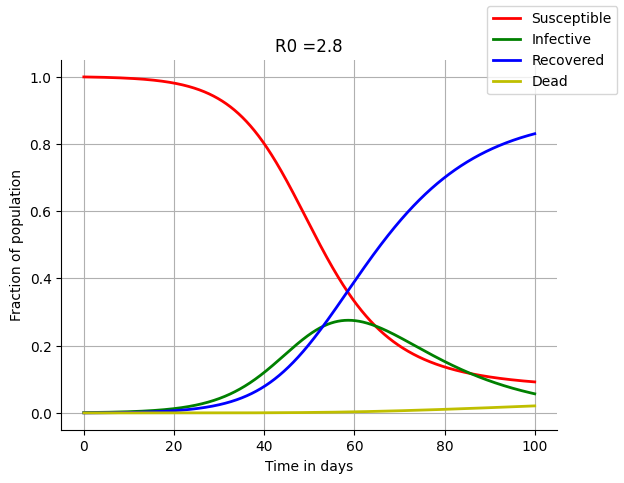

In [58]:

fig = plt.figure(1); fig.clf()
ax = fig.add_subplot(111, axisbelow=True)
plt.plot(t,S/N,'r',lw=2, label='Susceptible')
plt.plot(t,I/N,'g',lw=2, label='Infective')
plt.plot(t,R/N,'b',lw=2, label='Recovered')
plt.plot(t,D/N,'y',lw=2, label='Dead')
#plt.plot(t,T/N,'b',lw=2, label='Recovered')
fig.legend(); plt.xlabel('Time in days');plt.ylabel('Fraction of population')
for spine in ('top', 'right'): #, 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('R0 ='+str(round(R0,2)))
plt.grid()


# Etude 5

In [59]:
ndays = 250
dt = 0.001  # time step in days
npts = int(ndays/dt)
S = np.zeros(npts)
E = np.zeros(npts)
I = np.zeros(npts)
R = np.zeros(npts)
D = np.zeros(npts)
N = np.zeros(npts)   # naissances
t = np.arange(npts)*dt

n = 7.0


alpha = 0.3
beta = 0.2           # infection rate one infection among n persons 1/n
lamda = 14.0
gamma = (1.0/lamda)  # recovery rate 1 recovery every d days 1/d
v = 0.000027         # taux de natalité
u = 0.000024          # taux de mortalité hors maladie
R0 = alpha / gamma   # number of infections every d days with n contacts, the lower the best
beta, gamma, R0

(0.2, 0.07142857142857142, 4.2)

In [60]:
# Total population, N.
P = 1
E[0] = 0.001
S[0] = P - E[0]
I[0] = 0
R[0] = 0
D[0] = 0
N[0] = 0
# computing with series  see ode_SIR.py
for i in range(npts-1):
    S[i+1] = S[i] - beta*S[i]*I[i]/P*dt - u*S[i]*dt + v*S[i]*dt
    E[i+1] = E[i] + (beta*S[i]*I[i]/P - alpha*E[i] - u*E[i])*dt
    I[i+1] = I[i] + (alpha*E[i] - gamma*I[i] -u*I[i])*dt
    R[i+1] = R[i] + (gamma*I[i] - u*R[i])*dt
    D[i+1] = D[i] + (u*(S[i]+E[i]+I[i]+R[i]))*dt

    N[i+1] = N[i] - v*S[i]*dt

print(I.max())  # I.max is when the infective and recovered curves have the same variation in absolute value

S+E+I+R+D+N

0.22050248336535422


array([1., 1., 1., ..., 1., 1., 1.])

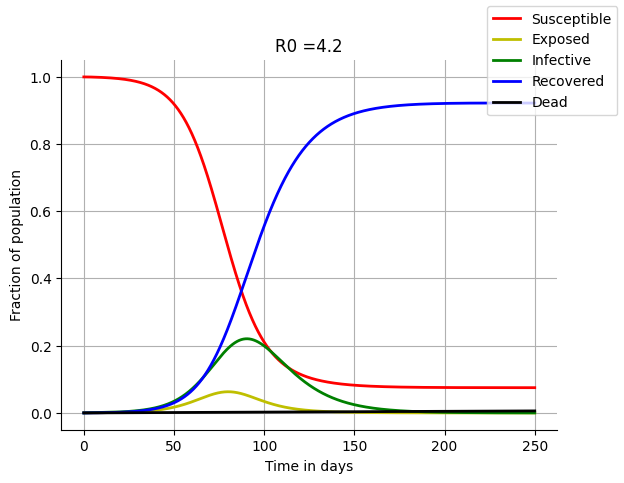

In [61]:

fig = plt.figure(1); fig.clf()
ax = fig.add_subplot(111, axisbelow=True)
plt.plot(t,S/P,'r',lw=2, label='Susceptible')
plt.plot(t,E/P,'y',lw=2, label='Exposed')
plt.plot(t,I/P,'g',lw=2, label='Infective')
plt.plot(t,R/P,'b',lw=2, label='Recovered')
plt.plot(t,D/P,'black',lw=2, label='Dead')
#plt.plot(t,T/N,'b',lw=2, label='Recovered')
fig.legend(); plt.xlabel('Time in days');plt.ylabel('Fraction of population')
for spine in ('top', 'right'): #, 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('R0 ='+str(round(R0,2)))
plt.grid()

In [62]:
from scipy.integrate import odeint

t = np.linspace(0,500, num=1000)
beta = 0.04
gamma = 0.01
params = [beta,gamma]
y0 = [100, 1, 0]

In [63]:
def sim(variables, t, params):

    S = variables[0]
    I = variables[1]
    R = variables[2]

    N = S + I + R

    beta = params[0]
    gamma = params[1]

    dSdt = -beta * I * S / N
    dIdt = beta * I * S / N - gamma * I
    dRdt = gamma * I

    return([dSdt, dIdt, dRdt])

In [64]:
y = odeint(sim, y0, t, args=(params,))
y

array([[1.00000000e+02, 1.00000000e+00, 0.00000000e+00],
       [9.99800326e+01, 1.01492514e+00, 5.04227600e-03],
       [9.99597714e+01, 1.03006885e+00, 1.01597700e-02],
       ...,
       [2.39240838e+00, 4.35263548e+00, 9.42549561e+01],
       [2.39034984e+00, 4.33295834e+00, 9.42766918e+01],
       [2.38830236e+00, 4.31336840e+00, 9.42983292e+01]])

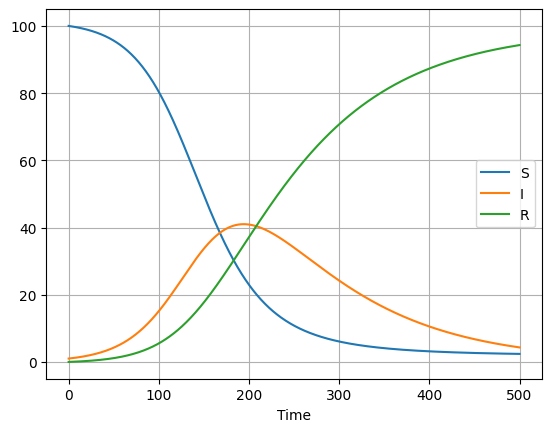

In [65]:
# plot
f,ax1= plt.subplots()
line1, = ax1.plot(t,y[:,0],label="S") # S
line2, = ax1.plot(t,y[:,1],label="I") # I
line3, = ax1.plot(t,y[:,2],label="R") # R
ax1.set_xlabel("Time")
ax1.legend()
ax1.grid()

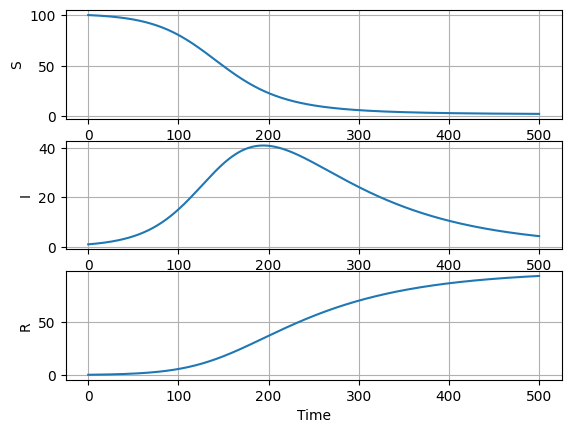

In [66]:
f,(ax1,ax2,ax3) = plt.subplots(3)
#f,ax1= plt.subplots()
line1, = ax1.plot(t,y[:,0]) # S
line2, = ax2.plot(t,y[:,1]) # I
line3, = ax3.plot(t,y[:,2]) # R
ax1.set_ylabel("S")
ax2.set_ylabel("I")
ax3.set_ylabel("R")
ax3.set_xlabel("Time")
ax1.grid()
ax2.grid()
ax3.grid()